In [1]:
import pandas as pd 
import numpy as np

In [2]:
data=pd.read_csv("C:\\Users\\Dell\\OneDrive\\Desktop\\excel books\\advertising.csv")

In [3]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
data.shape


(200, 4)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## visualization

In [8]:
import matplotlib.pyplot as plt

In [9]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [10]:
import seaborn as sns

<AxesSubplot:>

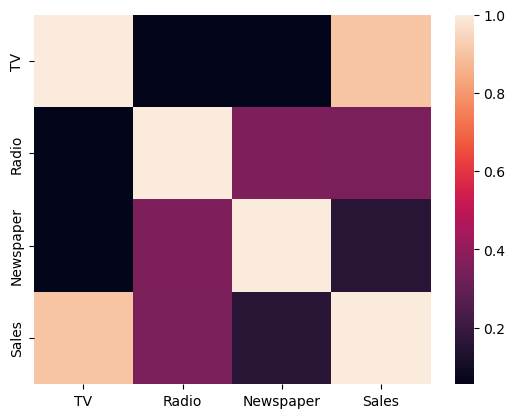

In [12]:
sns.heatmap(data.corr())

## standardization 

In [21]:
x = data.iloc[:,:3]
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [17]:
from sklearn.preprocessing import StandardScaler  

In [24]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [25]:
x

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.25304978e-01,  9.00494200e-01

In [26]:
y=data.iloc[:,[3]]

In [27]:
y

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9
...,...
195,7.6
196,14.0
197,14.8
198,25.5


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
(X_train,X_test,Y_train,Y_test) = train_test_split(x,y,test_size=0.2,random_state=0)

In [30]:
print (X_train.shape, Y_train.shape)
print(Y_test.shape)

(160, 3) (160, 1)
(40, 1)


## Using Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
reg = LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [37]:
y_pred = reg.predict(X_test)
display (y_pred.shape)

(40, 1)

In [38]:
from sklearn.metrics import r2_score,mean_absolute_error
print('R2 Score ', r2_score(Y_test, y_pred))
print('Mean Absolute Error', mean_absolute_error(Y_test,y_pred))

R2 Score  0.8645053923967725
Mean Absolute Error 1.4170313030600667


## Using Random Forest

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
regression = RandomForestRegressor(random_state=0)
regression.fit(X_train,Y_train)
display (regression)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16236\2512294759.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression.fit(X_train,Y_train)


RandomForestRegressor(random_state=0)

In [41]:
y_pred = regression.predict(X_test)
display (y_pred)

array([10.817,  9.934, 11.491, 25.154, 16.66 , 10.814,  8.935, 18.048,
        8.358, 17.921, 24.915, 11.386, 15.415, 19.626, 11.777, 12.341,
       19.869,  6.141, 13.391, 17.971, 25.258, 12.023, 16.846, 12.259,
       10.244, 14.709, 16.955, 22.508, 16.514,  7.655, 12.178, 23.072,
       19.965, 22.468,  6.32 ,  6.803, 10.319, 17.646, 12.734,  7.128])

## Accuracy 

In [42]:
from sklearn.metrics import r2_score,mean_absolute_error

In [44]:
print  ('R2 Score ', r2_score(Y_test, y_pred))
print  ('Mean Absolute Error', mean_absolute_error(Y_test,y_pred))

R2 Score  0.944962544303001
Mean Absolute Error 0.9545000000000006


## highest accuracy is found to algorithm RandomForest as 0.94